In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Contexto:

Um shopping quer melhorar o atendimento dos seus clientes com base nas preferências de compras deles.


#### Variáveis: </br>

ID: Identificador único do cliente </br>
Income - Renda anual declarada pelo cliente </br>
Year_Birth - Ano de nascimento </br>
MntFishProducts - Total gasto em produtos de peixaria nos últimos 2 anos </br>
MntMeatProducts - Total gasto em produtos de açougue nos últimos 2 anos </br>
MntFruits - Total gasto em produtos de feira nos últimos 2 anos </br>
MntSweetProducts - Total gasto em produtos de doceria nos últimos 2 anos </br>
MntWines - Total gasto em produtos de adega nos últimos 2 anos </br>
MntGoldProds - Total gasto em produtos de joalheria nos últimos 2 anos </br>

In [4]:
df = pd.read_csv(r'C:\Users\vivia\Projetos e Dados\base_cluster.csv')
df

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income
0,5524,635,88,546,172,88,88,1957,58138.0
1,2174,11,1,6,2,1,6,1954,46344.0
2,4141,426,49,127,111,21,42,1965,71613.0
3,6182,11,4,20,10,3,5,1984,26646.0
4,5324,173,43,118,46,27,15,1981,58293.0
...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0
2236,4001,406,0,30,0,0,8,1946,64014.0
2237,7270,908,48,217,32,12,24,1981,56981.0
2238,8235,428,30,214,80,30,61,1956,69245.0


In [5]:
df.set_index('ID') # analisar o perfil de compra do cliente 

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income
ID,,,,,,,,
5524,635,88,546,172,88,88,1957,58138.0
2174,11,1,6,2,1,6,1954,46344.0
4141,426,49,127,111,21,42,1965,71613.0
6182,11,4,20,10,3,5,1984,26646.0
5324,173,43,118,46,27,15,1981,58293.0
...,...,...,...,...,...,...,...,...
10870,709,43,182,42,118,247,1967,61223.0
4001,406,0,30,0,0,8,1946,64014.0
7270,908,48,217,32,12,24,1981,56981.0


In [6]:
 df.set_index('ID').filter(regex='Mnt', axis=1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,635,88,546,172,88,88
2174,11,1,6,2,1,6
4141,426,49,127,111,21,42
6182,11,4,20,10,3,5
5324,173,43,118,46,27,15
...,...,...,...,...,...,...
10870,709,43,182,42,118,247
4001,406,0,30,0,0,8
7270,908,48,217,32,12,24


In [7]:
df2 = df.set_index('ID').filter(regex='Mnt', axis='columns')
df2

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,635,88,546,172,88,88
2174,11,1,6,2,1,6
4141,426,49,127,111,21,42
6182,11,4,20,10,3,5
5324,173,43,118,46,27,15
...,...,...,...,...,...,...
10870,709,43,182,42,118,247
4001,406,0,30,0,0,8
7270,908,48,217,32,12,24


In [8]:
df2.sum()

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [9]:
df2.sum(axis=1)

ID
5524     1617
2174       27
4141      776
6182       53
5324      422
         ... 
10870    1341
4001      444
7270     1241
8235      843
9405      172
Length: 2240, dtype: int64

## Abrir documentação "pandas divide dataframe by series"

In [10]:
df3 = df2.div(df2.sum(axis=1), axis='rows')
df3

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545
...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339


In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
km.fit(df3)

KMeans(n_clusters=4)

In [26]:
clus = km.fit_predict(df3)

In [27]:
clus

array([3, 2, 2, ..., 1, 2, 2])

In [29]:
np.unique(clus, return_counts=True)

(array([0, 1, 2, 3]), array([382, 597, 733, 528], dtype=int64))

In [30]:
df3.loc[:,'cluster'] = clus
df3

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,cluster
ID,,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,3
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,2
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,2
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,3
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,2
...,...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,2
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,1
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,1


In [31]:
df3.groupby('cluster').mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cluster,,,,,,
0,0.144839,0.106659,0.202042,0.155227,0.112575,0.278658
1,0.746043,0.014246,0.140542,0.019189,0.013927,0.066052
2,0.500608,0.041165,0.247231,0.060537,0.043486,0.106973
3,0.301773,0.059598,0.410215,0.085429,0.057856,0.085130


In [32]:
aux = df3.groupby('cluster').mean()
aux

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cluster,,,,,,
0,0.144839,0.106659,0.202042,0.155227,0.112575,0.278658
1,0.746043,0.014246,0.140542,0.019189,0.013927,0.066052
2,0.500608,0.041165,0.247231,0.060537,0.043486,0.106973
3,0.301773,0.059598,0.410215,0.085429,0.057856,0.085130


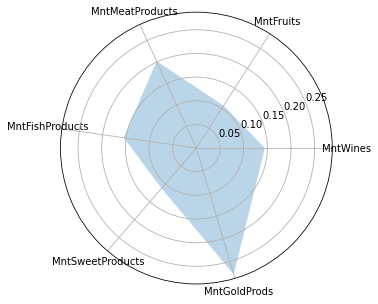

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1, projection='polar')
plt.fill(aux.loc[0], alpha=.3)

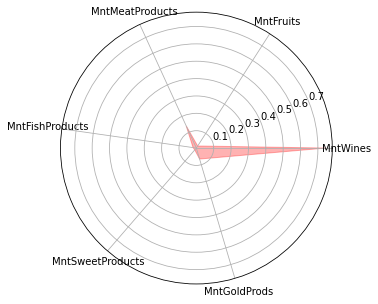

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,1,1, projection='polar')
plt.fill(aux.loc[1], alpha=.3, color='r')

In [20]:
df.loc[:,'cluster'] = clus
df

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income,cluster
0,5524,635,88,546,172,88,88,1957,58138.0,0
1,2174,11,1,6,2,1,6,1954,46344.0,3
2,4141,426,49,127,111,21,42,1965,71613.0,3
3,6182,11,4,20,10,3,5,1984,26646.0,0
4,5324,173,43,118,46,27,15,1981,58293.0,3
...,...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0,3
2236,4001,406,0,30,0,0,8,1946,64014.0,1
2237,7270,908,48,217,32,12,24,1981,56981.0,1
2238,8235,428,30,214,80,30,61,1956,69245.0,3


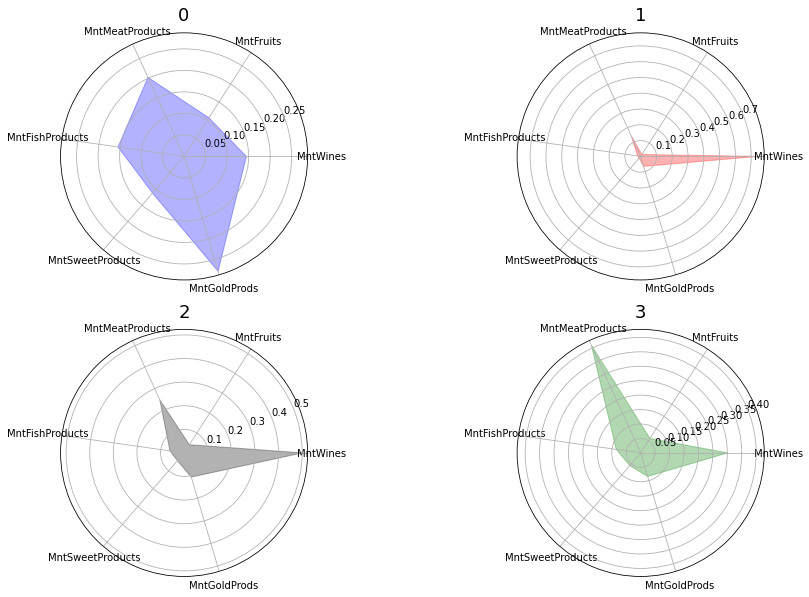

In [41]:
plt.figure(figsize=(15,2*5))
color = ['b', 'r', 'k', 'g']
for cl in aux.index:
    plt.subplot(2,2,cl+1, projection='polar')
    plt.fill(aux.loc[cl], color=color[cl], alpha=0.3)
    plt.title(cl,fontsize=18)

In [42]:
df.groupby('cluster').Year_Birth.mean()

cluster
0    1970.943182
1    1965.056951
2    1973.777487
3    1967.728513
Name: Year_Birth, dtype: float64

In [43]:
df.groupby('cluster').Income.mean()

cluster
0    57688.693050
1    55847.040472
2    32432.884514
3    55832.792818
Name: Income, dtype: float64